### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 7
### Due: Friday, Oct 20 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw7_data.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

In [94]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
from scipy.stats import norm
from scipy import optimize


# Load the data from the 'hw7_data.npy' file
data = np.load('hw7_data.npy')

# Extract the voltage measurements and uncertainties
voltage_measurements = data[:, 0]
uncertainties = data[:, 1]



# Task 1: Compute the sample mean and the standard error on the sample mean
sample_mean = np.mean(voltage_measurements)
sample_std = np.std(voltage_measurements, ddof=1)
standard_error = sample_std / np.sqrt(len(voltage_measurements))

print(sample_mean,sample_std,standard_error)




5.106 1.038430439547001 0.32838053806183115


<h1> 2. Finding the log likelihood and best fit mean voltage </h1>

In [95]:
# Task 2: Fit the likelihood function to find the best-fit mean voltage
def neg_ln_likelihood(mu):
    residuals = voltage_measurements - mu
    chi_squared = np.sum((residuals / uncertainties) ** 2)
    return chi_squared

result = optimize.minimize(neg_ln_likelihood, x0=sample_mean)
best_fit_mean = result.x[0]

# The best-fit mean voltage is in result.x
best_fit_mean_voltage = result.x[0]

print("Best-fit Mean Voltage:", best_fit_mean_voltage)

Best-fit Mean Voltage: 4.942118218777643


<h1> 3. Finding the posterior distribution of mean voltage and plotting it </h1>

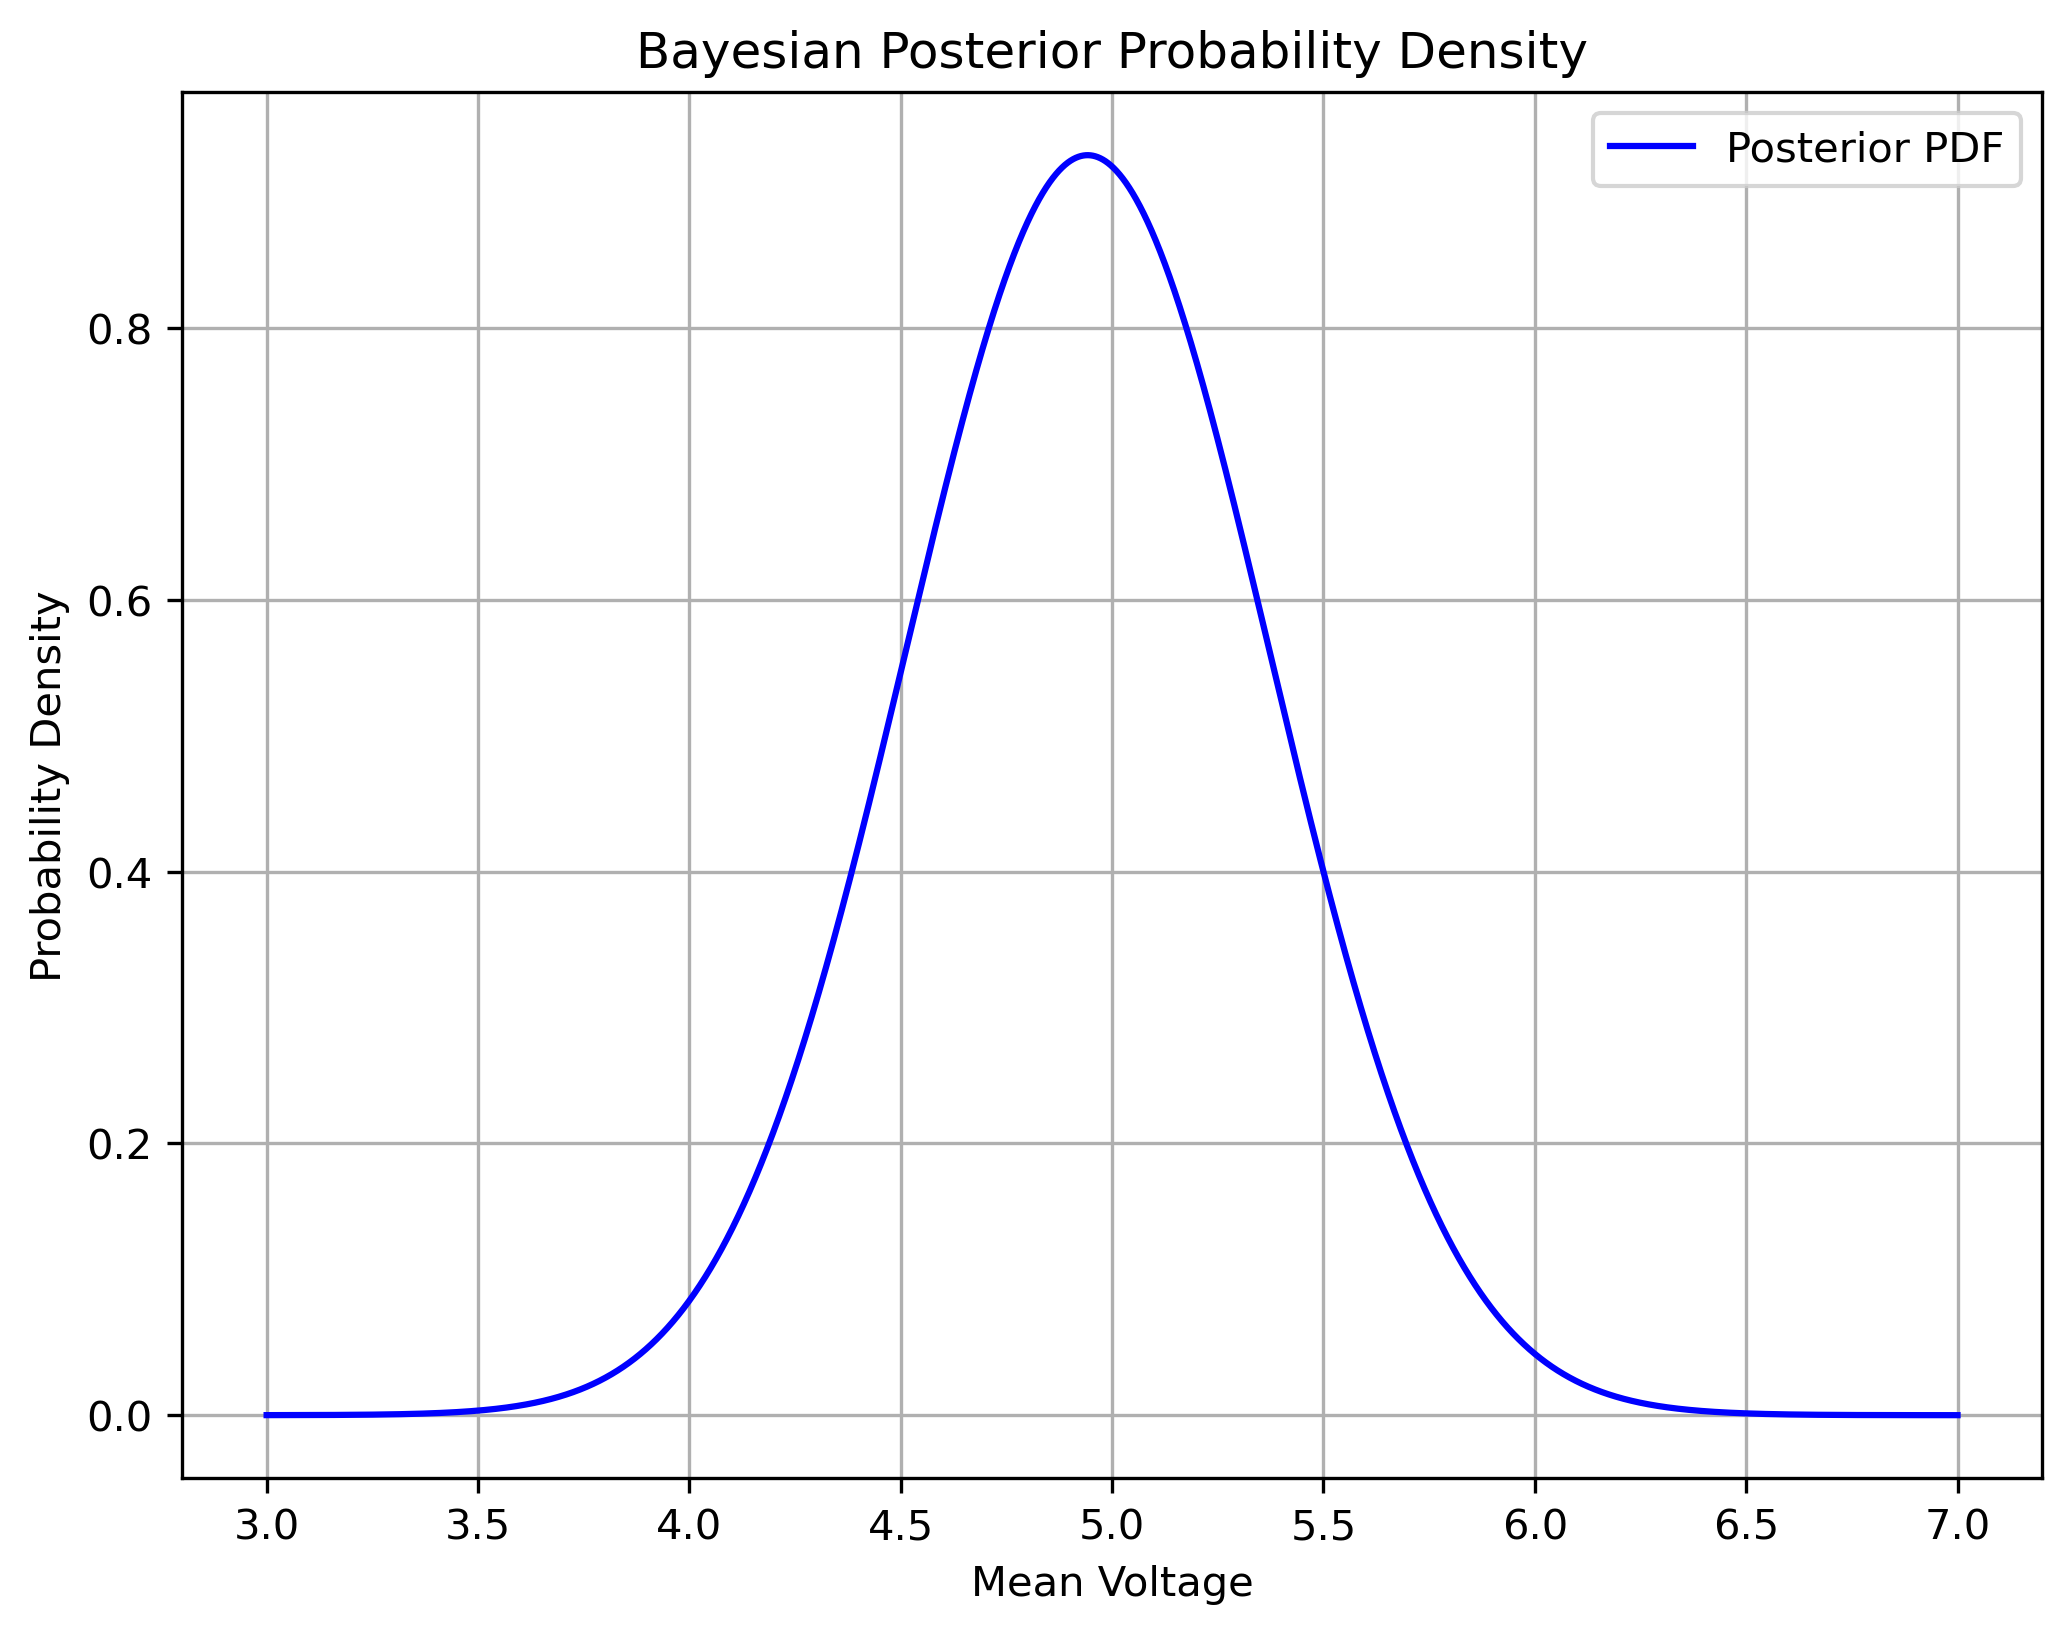

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the prior distribution as a uniform distribution in the range [3, 7]
prior = np.ones(10000)  # A large number of samples for the prior
prior /= np.trapz(prior, dx=(7 - 3) / 10000)  # Normalize the prior

# Define a range of mean voltage values
mu_values = np.linspace(3, 7, 10000)

# Calculate the likelihood for each mean voltage value
likelihood = np.prod(norm.pdf(voltage_measurements, mu_values[:, np.newaxis], uncertainties), axis=1)

# Calculate the unnormalized posterior by multiplying likelihood and prior
unnormalized_posterior = likelihood * prior

# Normalize the posterior
posterior_1 = unnormalized_posterior / np.trapz(unnormalized_posterior, dx=(7 - 3) / 10000)

# Plot the posterior probability density
plt.figure(figsize=(8, 6))
plt.plot(mu_values, posterior_1, label='Posterior PDF', color='blue')
plt.xlabel('Mean Voltage')
plt.ylabel('Probability Density')
plt.title('Bayesian Posterior Probability Density')
plt.legend()
plt.grid()
plt.show()


<h1> 4. Finding the CDF, credible regions, MAP.. </h1>

In [97]:

# Calculate the cumulative distribution function (CDF) of the posterior
cdf = np.cumsum(posterior_1) / np.sum(posterior_1)

# Find the indices where CDF crosses the lower and upper boundaries of the 68.3% credible region
lower_index = np.argmin(np.abs(cdf - (1 - 0.683) / 2))
upper_index = np.argmin(np.abs(cdf - (1 + 0.683) / 2))

# Get the corresponding values of the mean voltage for the credible region
lower_boundary = mu_values[lower_index]
upper_boundary = mu_values[upper_index]

# Calculate the MAP value of the mean voltage
map_index = np.argmax(posterior_1)
map_value = mu_values[map_index]

# Calculate sample mean and standard error
sample_mean = np.mean(voltage_measurements)
standard_error = np.std(voltage_measurements, ddof=1) / np.sqrt(len(voltage_measurements))



# print("Weighted Standard Error:", weighted_std_error)

print("Lower Boundary of 68.3% Credible Region:", lower_boundary)
print("Upper Boundary of 68.3% Credible Region:", upper_boundary)
print("MAP Value of the Mean:", map_value)
print("Sample Mean:", sample_mean)
print("Sample Mean +/- Standard Error:", sample_mean - standard_error, sample_mean + standard_error)


Lower Boundary of 68.3% Credible Region: 4.511351135113511
Upper Boundary of 68.3% Credible Region: 5.372637263726373
MAP Value of the Mean: 4.942194219421943
Sample Mean: 5.106
Sample Mean +/- Standard Error: 4.777619461938169 5.434380538061831


<h1> 5. Repeating steps (3) and (4) with new uniform prior on the mean  </h1>

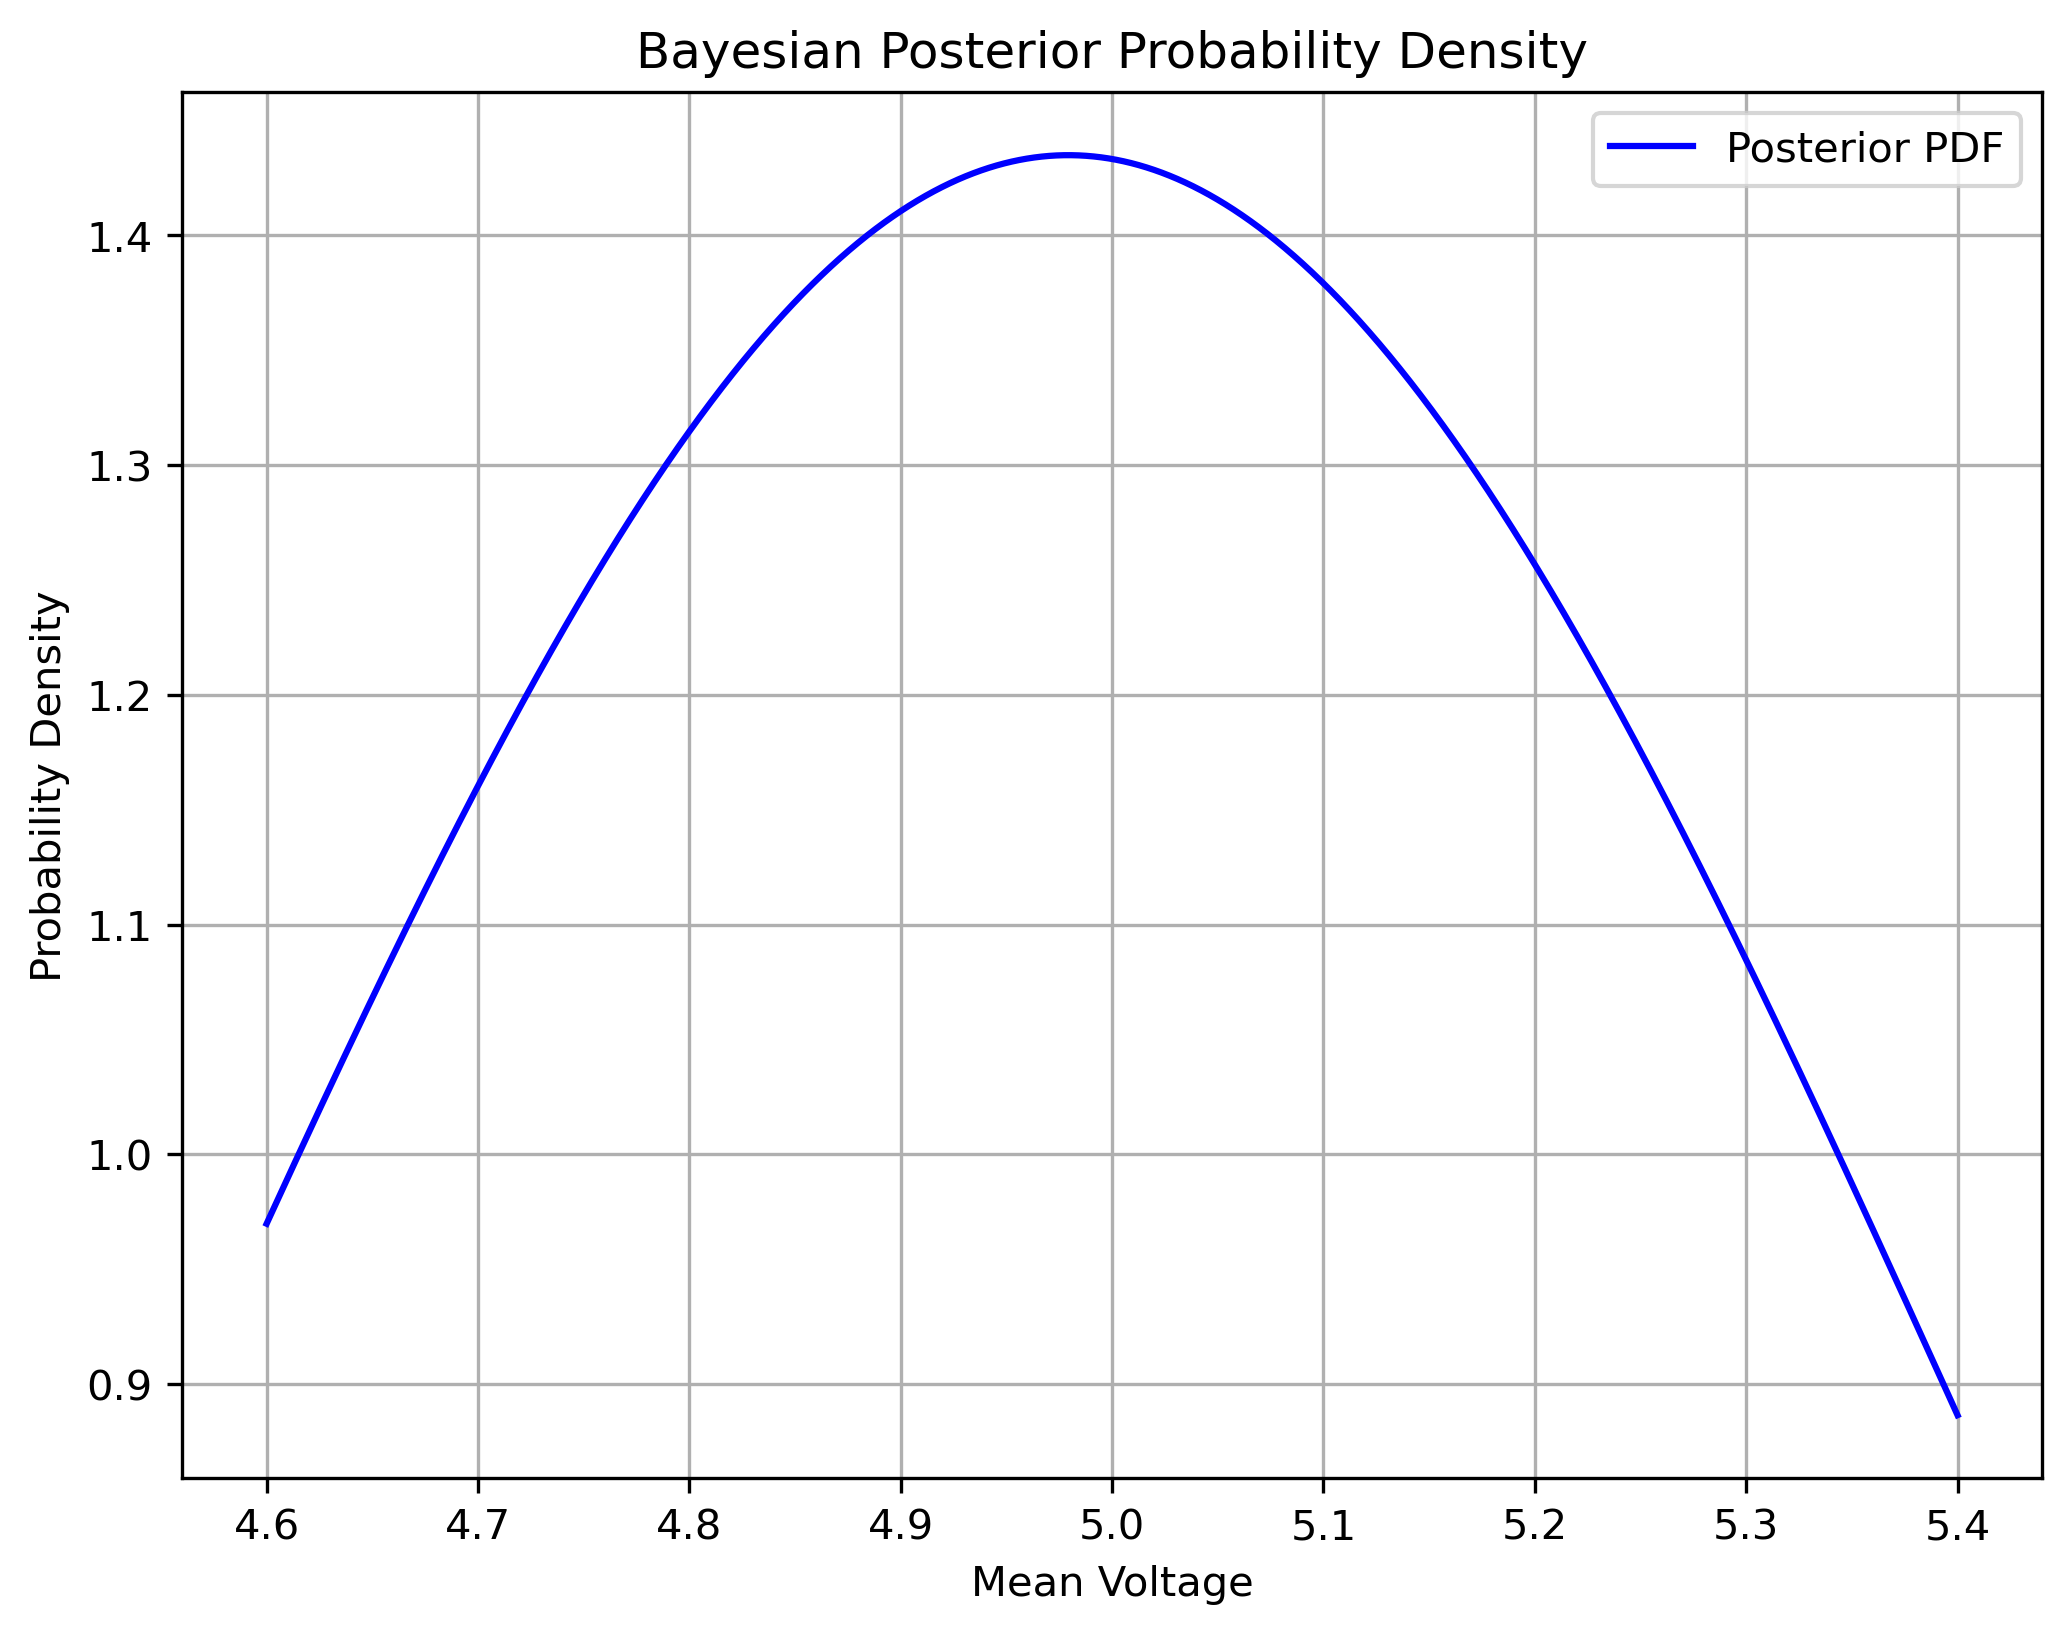

In [111]:
# Define the prior distribution as a uniform distribution in the range [4.6, 5.4]
a = 4.6  # Lower bound of the range
b = 5.4  # Upper bound of the range
n_samples = 10000  # Number of samples for the prior

# Generate a uniform prior distribution from a to b
prior = np.linspace(a, b, n_samples)

# Define a range of mean voltage values
mu_values = np.linspace(4.6, 5.4, 10000)

# Calculate the likelihood for each mean voltage value
likelihood = np.prod(norm.pdf(voltage_measurements, mu_values[:, np.newaxis], uncertainties), axis=1)

# Calculate the unnormalized posterior by multiplying likelihood and prior
unnormalized_posterior = likelihood * prior

# Normalize the posterior
posterior_2 = unnormalized_posterior / np.trapz(unnormalized_posterior, dx=(5.4 - 4.6) / 10000)

# Plot the posterior probability density
plt.figure(figsize=(8, 6))
plt.plot(mu_values, posterior_2, label='Posterior PDF', color='blue')
plt.xlabel('Mean Voltage')
plt.ylabel('Probability Density')
plt.title('Bayesian Posterior Probability Density')
# plt.xlim(4.4,5.6)
plt.legend()
plt.grid()
plt.show()


In [99]:

# Calculate the cumulative distribution function (CDF) of the posterior
cdf = np.cumsum(posterior_2) / np.sum(posterior_2)

# Find the indices where CDF crosses the lower and upper boundaries of the 68.3% credible region
lower_index = np.argmin(np.abs(cdf - (1 - 0.683) / 2))
upper_index = np.argmin(np.abs(cdf - (1 + 0.683) / 2))

# Get the corresponding values of the mean voltage for the credible region
lower_boundary = mu_values[lower_index]
upper_boundary = mu_values[upper_index]

# Calculate the MAP value of the mean voltage
map_index = np.argmax(posterior_2)
map_value = mu_values[map_index]

# Calculate sample mean and standard error
sample_mean = np.mean(voltage_measurements)
standard_error = np.std(voltage_measurements, ddof=1) / np.sqrt(len(voltage_measurements))



# print("Weighted Standard Error:", weighted_std_error)

print("Lower Boundary of 68.3% Credible Region:", lower_boundary)
print("Upper Boundary of 68.3% Credible Region:", upper_boundary)
print("MAP Value of the Mean:", map_value)
print("Sample Mean:", sample_mean)
print("Sample Mean +/- Standard Error:", sample_mean - standard_error, sample_mean + standard_error)


Lower Boundary of 68.3% Credible Region: 4.743214321432143
Upper Boundary of 68.3% Credible Region: 5.247184718471847
MAP Value of the Mean: 4.9793179317931795
Sample Mean: 5.106
Sample Mean +/- Standard Error: 4.777619461938169 5.434380538061831


<h1> 6. Repeating steps (3) and (4) with Gaussian prior on the mean </h1>

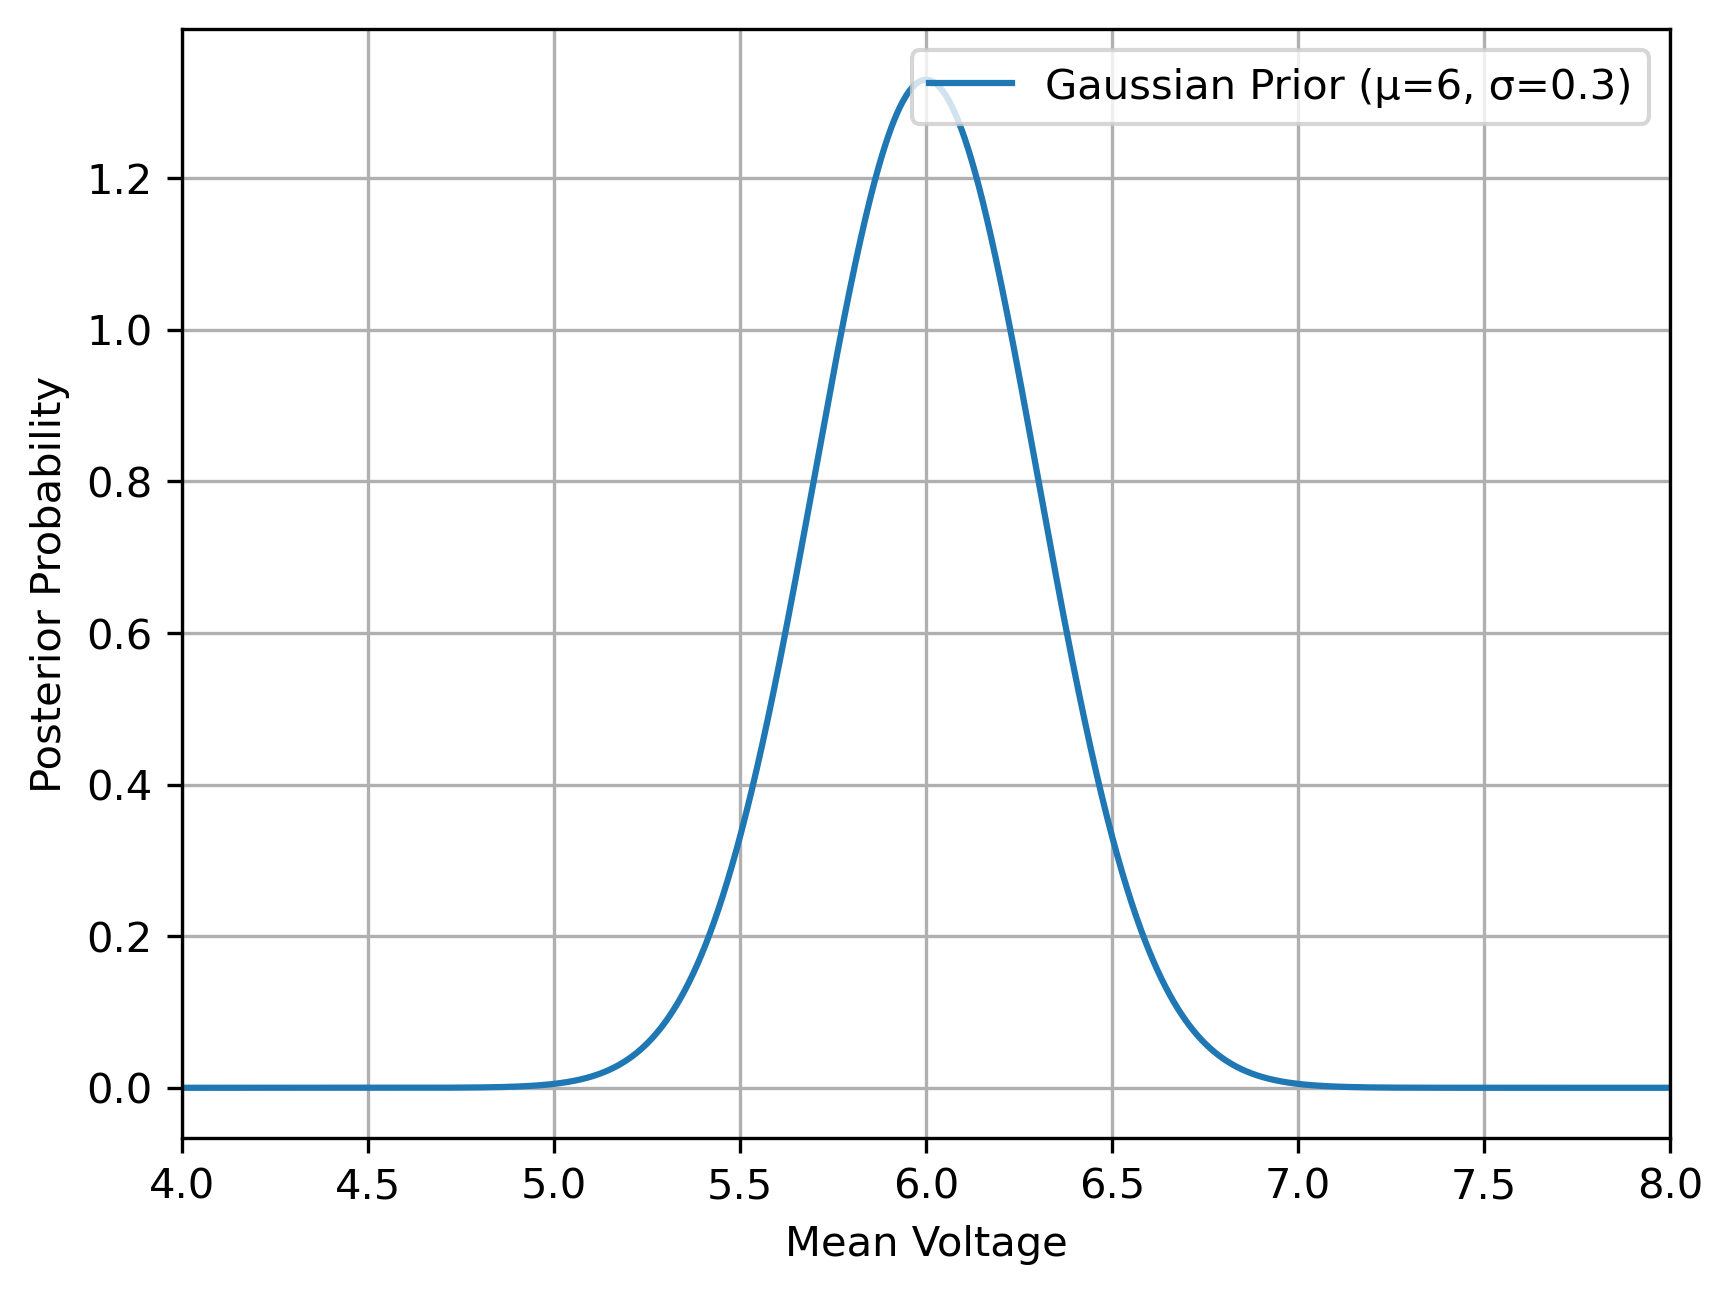

In [108]:
# Define the ln-likelihood function
def ln_likelihood(mu):
    return -0.5 * np.sum(((voltage_measurements - mu) / uncertainties)**2)


# Define parameters for the Gaussian prior
prior_mean = 6
prior_std = 0.3

# Calculate the Gaussian prior
prior_gaussian = 1 / (prior_std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((np.linspace(0, 10, 10000) - prior_mean) / prior_std)**2)

# Calculate the unnormalized posterior with the Gaussian prior
posterior_3 = np.exp(ln_likelihood(voltage_measurements)) * prior_gaussian

# Normalize the posterior with the Gaussian prior
posterior_3 /= np.trapz(posterior_3, dx=0.001)

# Plot the normalized posterior with the Gaussian prior
plt.plot(np.linspace(0, 10, 10000), posterior_3, label='Gaussian Prior (μ=6, σ=0.3)')
plt.xlabel('Mean Voltage')
plt.ylabel('Posterior Probability')
plt.legend(loc='upper right')
plt.grid()
plt.xlim(4,8)
plt.show()

In [109]:

# Calculate the cumulative distribution function (CDF) of the posterior
cdf = np.cumsum(posterior_3) / np.sum(posterior_3)

# Find the indices where CDF crosses the lower and upper boundaries of the 68.3% credible region
lower_index = np.argmin(np.abs(cdf - (1 - 0.683) / 2))
upper_index = np.argmin(np.abs(cdf - (1 + 0.683) / 2))

# Get the corresponding values of the mean voltage for the credible region
lower_boundary = mu_values[lower_index]
upper_boundary = mu_values[upper_index]

# Calculate the MAP value of the mean voltage
map_index = np.argmax(posterior_3)
map_value = mu_values[map_index]

# Calculate sample mean and standard error
sample_mean = np.mean(voltage_measurements)
standard_error = np.std(voltage_measurements, ddof=1) / np.sqrt(len(voltage_measurements))



# print("Weighted Standard Error:", weighted_std_error)

print("Lower Boundary of 68.3% Credible Region:", lower_boundary)
print("Upper Boundary of 68.3% Credible Region:", upper_boundary)
print("MAP Value of the Mean:", map_value)
print("Sample Mean:", sample_mean)
print("Sample Mean +/- Standard Error:", sample_mean - standard_error, sample_mean + standard_error)


Lower Boundary of 68.3% Credible Region: 0.8054128845518572
Upper Boundary of 68.3% Credible Region: 0.8075639492467219
MAP Value of the Mean: 1.3298064190509877
Sample Mean: 5.106
Sample Mean +/- Standard Error: 4.777619461938169 5.434380538061831


<h1> 7. Plotting posteriors 1, 2 and 3 together </h1>

Text(0.5, 1.0, 'Comparison between posteriors 1,2 and 3')

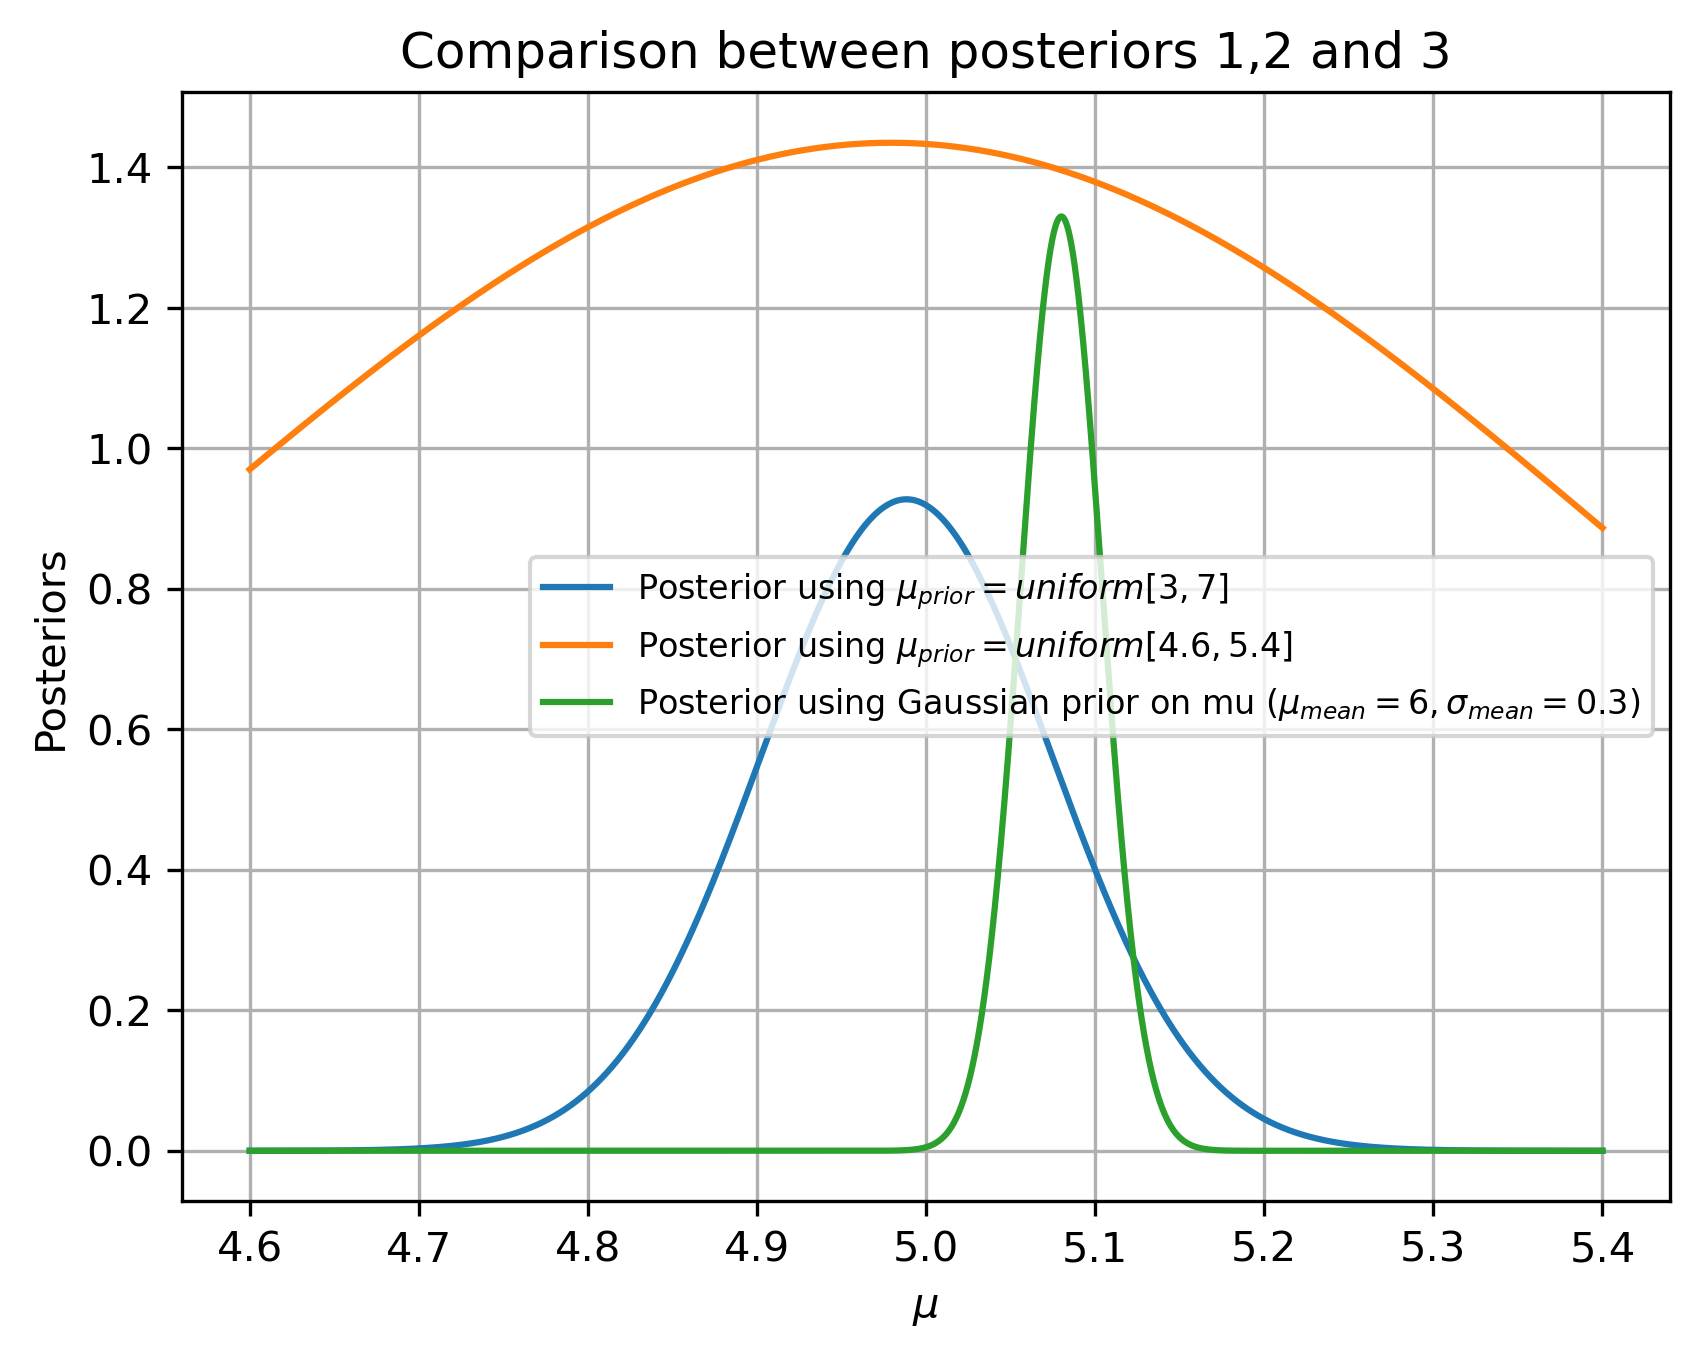

In [112]:
plt.plot(mu_values, posterior_1, label=r'Posterior using $\mu_{prior}=uniform[3,7]$')
plt.plot(mu_values, posterior_2, label=r'Posterior using $\mu_{prior}=uniform[4.6,5.4]$')
plt.plot(mu_values, posterior_3, label=r'Posterior using Gaussian prior on mu ($\mu_{mean} =6, \sigma_{mean}=0.3)$')
plt.legend(fontsize='8', loc ='best')
plt.xlabel(r'$\mu$')
plt.ylabel(r'Posteriors')
plt.grid()
plt.title('Comparison between posteriors 1,2 and 3')

In [124]:
# Compute evidence for the delta function prior model
delta_prior_posterior = np.exp(ln_likelihood(best_fit_mean))
delta_prior_evidence = np.trapz(delta_prior_posterior, dx=0.01)

# Compute evidence for the uniform prior model from Step 3
uniform_prior_evidence = np.trapz(posterior_2, dx=0.01)

# Calculate the Bayes factor
bayes_factor = uniform_prior_evidence / delta_prior_evidence

print("Evidence (Delta Function Prior):", delta_prior_evidence)
print("Evidence (Uniform Prior from Step 3):", uniform_prior_evidence)
print("Bayes Factor (Uniform Prior / Delta Function Prior):", bayes_factor)


IndexError: list assignment index out of range